## Packages

In [3]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
sys.path.append(r"C:\Users\Diego\Desktop\app_prod\research\CommodityInflationFactor\root\src")
from InflationFactorGenerator import FactorModel

## Principal Components

First start looking at the principal components of the breakeven curve and the inflation swap curve

In [15]:
def get_fitted_values() -> pd.DataFrame: 
    
    data_path = r"C:\Users\Diego\Desktop\app_prod\research\CommodityInflationFactor\data\FittedPCValues"
    df_out = (pd.concat([(pd.read_parquet(
        path = os.path.join(data_path, path), engine = "pyarrow").
        assign(inflation_group = file.split(".")[0])) 
         for file in os.listdir(data_path)]))
    
    return df_out

df_fitted = get_fitted_values()

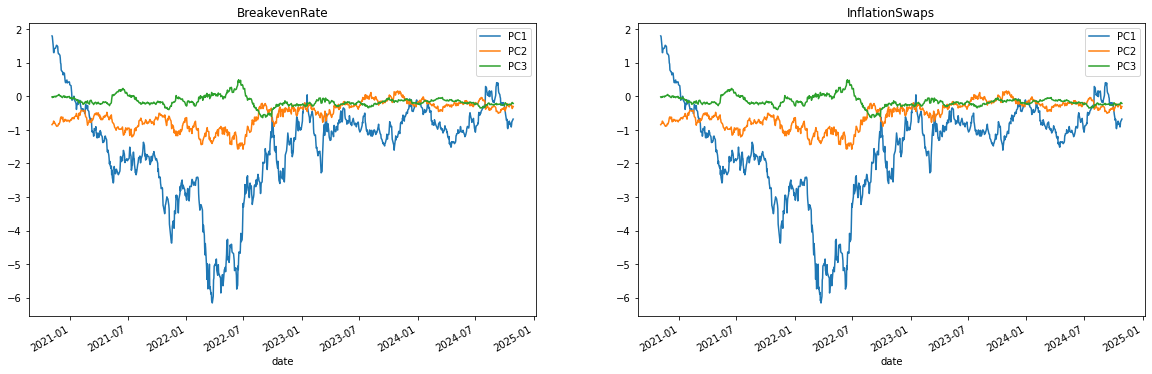

In [55]:
inflation_groups = df_fitted.inflation_group.drop_duplicates().to_list()
fig, axes        = plt.subplots(ncols = len(inflation_groups), figsize = (20,6))

for inflation_group, ax in zip(inflation_groups, axes.flatten()):
    
    (df_fitted.query(
        "inflation_group == @inflation_group").
        drop(columns = ["inflation_group"]).
        tail(1_000).
        plot(
            ax = ax,
            title = inflation_group))

In [66]:
(df_fitted.reset_index()[
    ["date", "PC1", "inflation_group"]].
    query("date == date.min()"))

,date,PC1,inflation_group
0,1998-08-03,4.498778,BreakevenRate
11908,1998-08-03,4.498778,InflationSwaps
